In [1]:
!pip install opencv-python
import cv2
import numpy as np
import matplotlib.pyplot as plt

# getting model 

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'
model = cv2.dnn_DetectionModel(frozen_model,config_file)

# getting classes

In [5]:
classLabels=[]
file_name =r'C:\Users\Ammar Omar\Desktop\object detection\labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/ 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True) # it automatically changes bgr to rgb

<dnn_Model 00000201533B7450>

# getting images

(1440, 2560, 3)


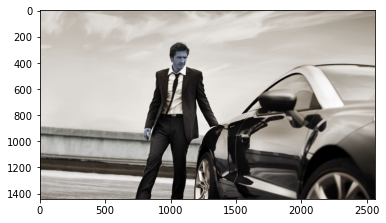

In [7]:
img= cv2.imread(r'C:\Users\Ammar Omar\Desktop\object detection\imga3.jpg')
print(img.shape)
plt.imshow(img)

In [8]:
#  converts bgr to rgb
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 


# classifiying images

In [9]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [10]:
print(bbox)

[[1223  391 1328 1044]
 [ 720  243  670 1197]]


In [11]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),3) #rectangle colour 
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,250,0),thickness=6) # font colour
    

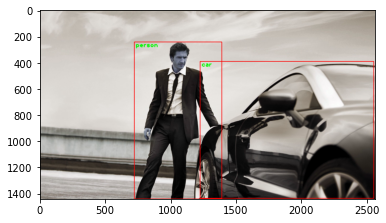

In [12]:
plt.imshow(img)

# classifying video

In [13]:
cap=cv2.VideoCapture(1)

In [14]:
# code to not let open video if it is corrupted
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IDError("cannot open video")

In [15]:
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN
while True:
    ret,frame = cap.read()
    

    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
   

    print(ClassIndex)
    if (len(ClassIndex) != 0):
        for ClassInd,conf,boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
            if (ClassInd <= 80):
                cv2.rectangle(frame,boxes,(255,0,0),2) #rectangle colour 
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,250,0),thickness=6) # font colour
    cv2.imshow('object detection tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [75]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[75]
 [ 1]
 [75]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [75]]
[[1]]
[[1]]
[[1]]
[[ 1]
 [46]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[75]
 [ 1]]
[[1]]
[[47]
 [ 1]]
[[1]]
[[ 1]
 [46]]
[[ 1]
 [75]]
[[1]]
[[ 1]
 [75]]
[[ 1]
 [75]]
[[ 1]
 [75]]
[[ 1]
 [75]]
[[1]]
[[1]]
[[ 1]
 [75]]
[[1]]
[[ 1]
 [75]]
[[ 1]
 [75]]
[[75]
 [ 1]]
[[75]
 [ 1]]
[[75]
 [ 1]
 [75]]
[[75]
 [ 1]]
[[ 1]
 [75]]
[[75]
 [ 1]]
[[75]
 [ 1]]
[[75]
 [ 1]]
[[75]
 [ 1]
 [47]
 [46]]
[[ 1]
 [75]]
[[75]
 [ 1]
 [75]]
[[ 1]
 [75]
 [75]]
[[ 1]
 [75]
 [75]]
[[ 1]
 [75]
 [75]]
[[ 1]
 [75]
 [75]]
[[ 1]
 [75]
 [75]]
[[ 1]
 [75]
 [75]]
[[ 1]
 [75]
 [75]]
[[ 1]
 [75]
 [75]]
[[75]
 [ 1]
 [75]]
[[ 1]
 [75]
 [75]]
[[ 1]
 [75]
 [75]]
[[ 1]
 [75]]
[[75]
 [ 1]]
[[ 1]
 [75]]
[[ 1]
 [82]]
[[ 1]
 [47]]
[[ 1]
 [75]]
[[ 1]
 [75]]
[[ 1]
 [75]]
[[ 1]
 

[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]
 [67]]
[[47]
 [62]]
[[47]
 [62]
 [67]]
[[47]
 [62]
 [67]]
[[47]
 [62]]
[[47]
 [62]
 [67]]
[[62]
 [47]
 [67]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]]
[[47]
 [62]]
[[47]
 [62]]
[[47]]
[[47]]
[[47]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]]
[[47]]
[[47]]
[[47]]
[[47]
 [62]]
[[47]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]
 [62]]
[[47]]
[[47]]
[[47]
 [62]]
[[47]]
[[47]]
[[47]
 [62]]
[[47]
 [62]]
[[47]]
[[47]]
[[47]]
[[47]
 [62]]
[[47]]
[[47]]
[[47]]
[[47]
 [ 1]]
[[47]
 [ 1]]
[[47]]
[[47]]
[[1]]
[[1]]
[[75]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]]
[[1]

KeyboardInterrupt: 